In [255]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder

In [256]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [257]:
# Seeing first 5 rows of dataset
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [258]:
# Summary Statistics for Numerical Numbers 
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


- Count: Indicates the number of non-null values for each column. For example, there are 1470 observations for each numerical variable in this dataset.

- Mean: Represents the average value of each numerical variable. For instance, the mean age of employees in the dataset is approximately 36.92 years.

- Standard Deviation (std): Shows the measure of dispersion or spread of the values around the mean. A higher standard deviation indicates greater variability in the data.

- Minimum (min): Denotes the minimum value observed in each numerical variable. For example, the minimum age in the dataset is 18 years.

- 25th Percentile (25%): Also known as the first quartile, this value indicates the data point below which 25% of the observations fall. It provides information about the spread of lower values in the dataset.

- 50th Percentile (50%): Represents the median value of each numerical variable. Half of the observations fall below this value, and half fall above it.

- 75th Percentile (75%): Also known as the third quartile, this value indicates the data point below which 75% of the observations fall. It provides information about the spread of higher values in the dataset.

- Maximum (max): Denotes the maximum value observed in each numerical variable. For instance, the maximum age in the dataset is 60 years.

In [259]:
df.describe(include=["object"])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [260]:
# Seeing Shape of dataset
print(df.shape)

(1470, 35)


In [261]:
# Printing Columns 
print(df.columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [262]:
# Summary of data frame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- DataFrame Type(Dtype): Indicates that the object being displayed is a DataFrame from the pandas library.

- RangeIndex: Shows the range of the index, which in this case, goes from 0 to 1469.

- Total Entries: Specifies the total number of entries in the DataFrame, which is 1470 in this case.

- Data Columns: Displays the names of all columns in the DataFrame along with their respective total counts and data types.

- Non-Null Count: Shows the number of non-null (non-missing) values present in each column. All columns have 1470 non-null values, indicating that there are no missing values in the dataset.

- Data Types: Specifies the data type of each column. Columns with integers are represented by int64, and columns with objects (strings) are represented by object.

- Memory Usage: Indicates the memory usage of the DataFrame. In this case, it is approximately 402.1 KB

In [263]:
# Checking missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- This shows that dataset is clean we don't need to deal with null values 

In [264]:
# Checking unique values
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [265]:
target = 'Attrition'
features = df.drop(target, axis=1).columns.to_list()
uniques = []
for f in features:
    item = {'feature':f}
    count = len(df[f].unique())
    item['unique'] = count
    if count < 20:
        item['values'] = df[f].unique().tolist()
    elif count < df.shape[0]:
        item['values'] = df[f].unique().tolist()[:20] + ['...']
    else:
        item['values'] = ['All values are unique']
    uniques.append(item)
df_uniques = pd.DataFrame(uniques)
df_uniques = df_uniques.set_index('feature')

df_uniques.style.background_gradient(subset=['unique'], cmap='Reds')

,unique,values
feature,,
Age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 29, 31, 34, 28, 22, 53, 24, 21, 42, '...']"
BusinessTravel,3,"['Travel_Rarely', 'Travel_Frequently', 'Non-Travel']"
DailyRate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358, 216, 1299, 809, 153, 670, 1346, 103, 1389, 334, 1123, 1219, 371, '...']"
Department,3,"['Sales', 'Research & Development', 'Human Resources']"
DistanceFromHome,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5, 11, 9, 7, 6, 10, 4, 25, '...']"
Education,5,"[2, 1, 4, 3, 5]"
EducationField,6,"['Life Sciences', 'Other', 'Medical', 'Marketing', 'Technical Degree', 'Human Resources']"
EmployeeCount,1,[1]
EmployeeNumber,1470,['All values are unique']


In [266]:
df.drop(columns = ['EmployeeCount', 'EmployeeNumber', 'Over18'], inplace = True)

In [267]:
df["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

#### Indicates the total count of occurrences for each unique value in the "Attrition" column.

- No: There are 1233 occurrences of the value "No" in the "Attrition" column.
- Yes: There are 237 occurrences of the value "Yes" in the "Attrition" column.

- What are average values of numerical features for Attrtion?

In [268]:
df[df["Attrition"] == "Yes"]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
14,28,Yes,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,...,2,80,0,6,4,3,4,2,0,3
21,36,Yes,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,...,2,80,0,10,4,3,5,3,0,3
24,34,Yes,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,...,3,80,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Yes,Travel_Frequently,638,Sales,9,3,Marketing,4,Male,...,1,80,1,1,3,2,1,0,1,0
1442,29,Yes,Travel_Rarely,1092,Research & Development,1,4,Medical,1,Male,...,2,80,3,4,3,4,2,2,2,2
1444,56,Yes,Travel_Rarely,310,Research & Development,7,2,Technical Degree,4,Male,...,4,80,1,14,4,1,10,9,9,8
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,2,Male,...,4,80,2,12,3,3,6,3,0,1


In [269]:
fig = px.pie(df, names = 'Attrition', title = 'Attrition Raio')
fig.show()

- Sorting

In [270]:
df.sort_values(by=["Age","Attrition"], ascending=False).head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
411,60,No,Travel_Rarely,422,Research & Development,7,3,Life Sciences,1,Female,...,4,80,0,33,5,1,29,8,11,10
427,60,No,Travel_Frequently,1499,Sales,28,3,Marketing,3,Female,...,4,80,0,22,5,4,18,13,13,11
536,60,No,Travel_Rarely,1179,Sales,16,4,Marketing,1,Male,...,4,80,0,10,1,3,2,2,2,2
879,60,No,Travel_Rarely,696,Sales,7,4,Marketing,2,Male,...,2,80,1,12,3,3,11,7,1,9
1209,60,No,Travel_Rarely,370,Research & Development,1,4,Medical,3,Male,...,3,80,1,19,2,4,1,0,0,0


In [271]:
df.sort_values(by="Age", ascending=True).head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1311,18,No,Non-Travel,1431,Research & Development,14,3,Medical,2,Female,...,3,80,0,0,4,1,0,0,0,0
457,18,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,2,Male,...,4,80,0,0,3,3,0,0,0,0
972,18,No,Non-Travel,1124,Research & Development,1,3,Life Sciences,4,Female,...,3,80,0,0,5,4,0,0,0,0
301,18,No,Travel_Rarely,812,Sales,10,3,Medical,4,Female,...,1,80,0,0,2,3,0,0,0,0
296,18,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,3,Male,...,3,80,0,0,2,3,0,0,0,0


 - DataFrame has been sorted by the "Age" column in descending order,Ascending order showing the top 5 rows of employees with the highest & Least ages

In [272]:
sorted_df = df[df['Attrition'] == 'Yes'].sort_values(by='Age')
sorted_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
296,18,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,3,Male,...,3,80,0,0,2,3,0,0,0,0
1153,18,Yes,Travel_Frequently,544,Sales,3,2,Medical,2,Female,...,3,80,0,0,2,4,0,0,0,0
457,18,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,2,Male,...,4,80,0,0,3,3,0,0,0,0
828,18,Yes,Non-Travel,247,Research & Development,8,1,Medical,3,Male,...,4,80,0,0,0,3,0,0,0,0
892,19,Yes,Non-Travel,504,Research & Development,10,3,Medical,1,Female,...,2,80,0,1,2,4,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,58,Yes,Travel_Rarely,289,Research & Development,2,3,Technical Degree,4,Male,...,1,80,0,7,4,3,1,0,0,0
660,58,Yes,Travel_Frequently,781,Research & Development,2,1,Life Sciences,4,Male,...,4,80,1,3,3,2,1,0,0,0
126,58,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,4,Female,...,4,80,1,40,3,2,40,10,15,6
966,58,Yes,Travel_Rarely,601,Research & Development,7,4,Medical,3,Female,...,4,80,0,31,0,2,10,9,5,9


* it provides information about employees who have attrited ('Yes') from the company, sorted by their age in ascending order. Each row represents an employee who has left the company ('Yes' in the "Attrition" column), and the columns provide various details about each employee 

In [273]:
numeric_columns = [column for column in df.columns if df[column].dtype == 'int64']
print(numeric_columns)

['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


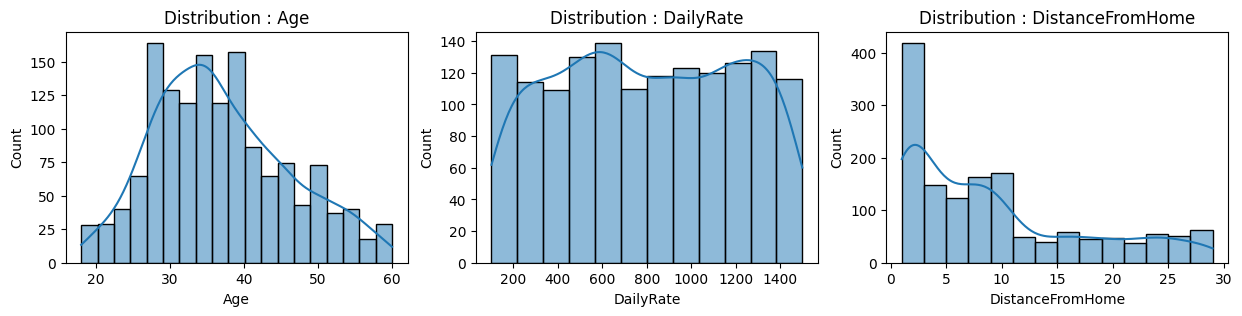

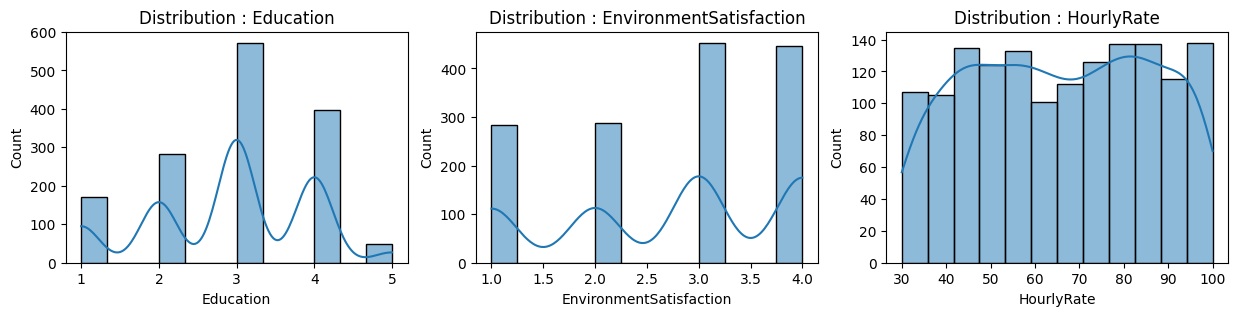

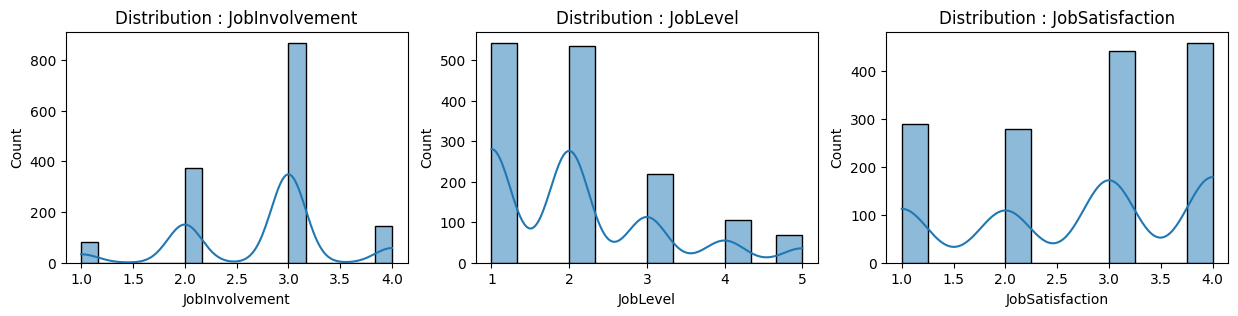

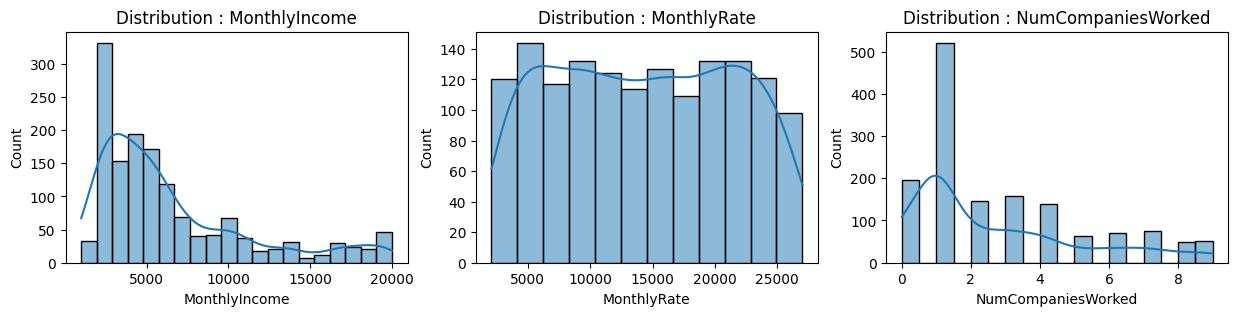

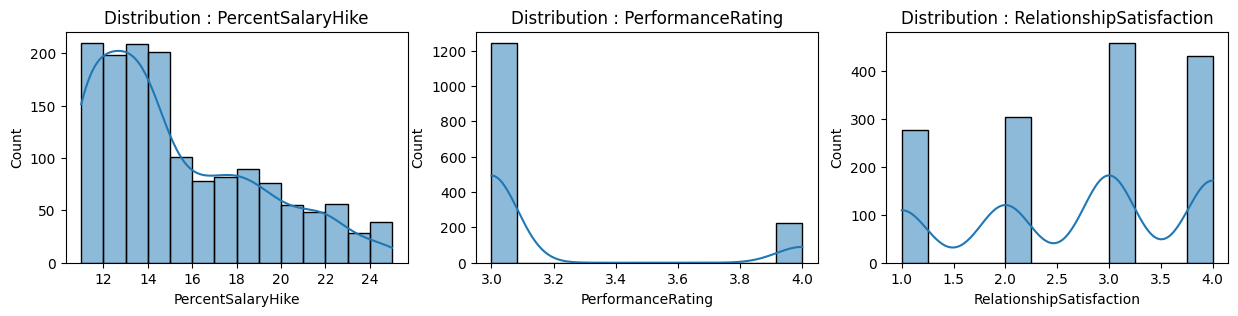

In [274]:
# Discrete Functions Distribution
for i in range(5):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
    a = 1
    for j in numeric_columns[(i * 3):(i * 3) + 3]:
        plt.subplot(1, 3, a)
        sns.histplot(df[j], kde=True, ax=ax[a-1]) 
        plt.title('Distribution : ' + j)
        a += 1
    plt.show()

In [275]:
categorical_columns = [column for column in df.columns if df[column].dtype != 'int64']
print(categorical_columns)

['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


- Plotting Categorical Columns 

In [276]:
import plotly.graph_objects as go

# Count the values in the 'MaritalStatus' column
marital_status_counts = df['MaritalStatus'].value_counts()

# Create a pie chart for marital status with 3 different colors
fig = go.Figure(data=[go.Pie(labels=marital_status_counts.index, values=marital_status_counts.values,
                             marker_colors=['orange', 'green', 'blue'])])
fig.update_layout(title='<b>Proportion Of Marital Status<b>')
fig.show()


In [277]:
import plotly.graph_objects as go

# Count the values in the 'JobSatisfaction' column
satisfaction_counts = df['JobSatisfaction'].value_counts()

# Create a pie chart for job satisfaction with 4 different colors
fig = go.Figure(data=[go.Pie(labels=satisfaction_counts.index, values=satisfaction_counts.values,
                             marker_colors=['orange', 'green', 'blue', 'red'])])
fig.update_layout(title='<b>Proportion Of Job Satisfaction<b>')
fig.show()


In [278]:
import plotly.graph_objects as go

# Count the values in the 'JobLevel' column
job_level_counts = df['JobLevel'].value_counts()

# Create a pie chart for job level with 4 different colors
fig = go.Figure(data=[go.Pie(labels=job_level_counts.index, values=job_level_counts.values,
                             marker_colors=['orange', 'green', 'blue', 'red'])])
fig.update_layout(title='<b>Proportion Of Job Level<b>')
fig.show()


In [279]:
import plotly.graph_objects as go

# Count the values in the 'OverTime' column
OverTime_counts = df['OverTime'].value_counts()

# Create a bar chart for overtime with 4 different colors
fig = go.Figure(data=[go.Bar(x=OverTime_counts.index, y=OverTime_counts.values,
                             marker_color=['orange', 'green', 'blue', 'red'])])
fig.update_layout(title='<b>OverTime<b>')
fig.show()


In [280]:
import plotly.graph_objects as go

# Count the values in the 'JobRole' column
JobRole_counts = df['JobRole'].value_counts()

# Create a pie chart for job roles with 4 different colors
fig = go.Figure(data=[go.Pie(labels=JobRole_counts.index, values=JobRole_counts.values,
                             marker_colors=['orange', 'green', 'blue', 'red'])])
fig.update_layout(title='<b>Job Role<b>')
fig.show()


In [312]:
import plotly.graph_objects as go

# Count the values in the 'Department' column
Department_counts = df["EnvironmentSatisfaction"].value_counts()

# Create a pie chart for departments with 3 different colors
fig = go.Figure(data=[go.Pie(labels=Department_counts.index, values=Department_counts.values,
                             marker_colors=['orange', 'green', 'blue'])])
fig.update_layout(title='<b>Environment Satisfaction<b>')
fig.show()


In [281]:
import plotly.graph_objects as go

# Count the values in the 'Department' column
Department_counts = df['Department'].value_counts()

# Create a pie chart for departments with 3 different colors
fig = go.Figure(data=[go.Pie(labels=Department_counts.index, values=Department_counts.values,
                             marker_colors=['orange', 'green', 'blue'])])
fig.update_layout(title='<b>Department<b>')
fig.show()


In [321]:
import plotly.graph_objects as go

# Count the values in the 'EducationField' column
EducationField_counts = df["NumCompaniesWorked"].value_counts()

# Create a pie chart for education fields with 4 different colors
fig = go.Figure(data=[go.Pie(labels=EducationField_counts.index, values=EducationField_counts.values,
                             marker_colors=['orange', 'green', 'blue', 'red'])])
fig.update_layout(title='<b>Number of Companies Worked<b>')
fig.show()


In [282]:
import plotly.graph_objects as go

# Count the values in the 'EducationField' column
EducationField_counts = df['EducationField'].value_counts()

# Create a pie chart for education fields with 4 different colors
fig = go.Figure(data=[go.Pie(labels=EducationField_counts.index, values=EducationField_counts.values,
                             marker_colors=['orange', 'green', 'blue', 'red'])])
fig.update_layout(title='<b>Education Field<b>')
fig.show()


In [283]:
import plotly.graph_objects as go

# Count the values in the 'BusinessTravel' column
BusinessTravel_counts = df['BusinessTravel'].value_counts()

# Create a bar chart for business travel with 3 different colors
fig = go.Figure(data=[go.Bar(x=BusinessTravel_counts.index, y=BusinessTravel_counts.values,
                             marker_color=['orange', 'green', 'blue'])])
fig.update_layout(title='<b>Business Travel<b>')
fig.show()


In [284]:
import plotly.graph_objects as go

# Count the values in the 'PerformanceRating' column
PerformanceRating_counts = df['PerformanceRating'].value_counts()

# Create a bar chart for performance rating with 3 different colors
fig = go.Figure(data=[go.Bar(x=PerformanceRating_counts.index, y=PerformanceRating_counts.values,
                             marker_color=['orange', 'green', 'blue'])])
fig.update_layout(title='<b>Performance Rating<b>')
fig.show()


In [285]:
import plotly.graph_objects as go

# Count the values in the 'RelationshipSatisfaction' column
RelationshipSatisfaction_counts = df['RelationshipSatisfaction'].value_counts()

# Create a pie chart for relationship satisfaction with 4 different colors
fig = go.Figure(data=[go.Pie(labels=RelationshipSatisfaction_counts.index, values=RelationshipSatisfaction_counts.values,
                             marker_colors=['orange', 'green', 'blue', 'red'])])
fig.update_layout(title='<b>Relationship Satisfaction<b>')
fig.show()


In [286]:
import plotly.graph_objects as go

# Count the values in the 'WorkLifeBalance' column
WorkLifeBalance_counts = df['WorkLifeBalance'].value_counts()

# Create a pie chart for work-life balance with 3 different colors
fig = go.Figure(data=[go.Pie(labels=WorkLifeBalance_counts.index, values=WorkLifeBalance_counts.values,
                             marker_colors=['orange', 'green', 'blue'])])
fig.update_layout(title='<b>Work Life Balance<b>')
fig.show()


Correlation Analysis

In [287]:
df_numeric = df._get_numeric_data()
df_corr = df_numeric.corr()
df_corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,-0.012454,NaN,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,0.025873,NaN,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<Axes: >

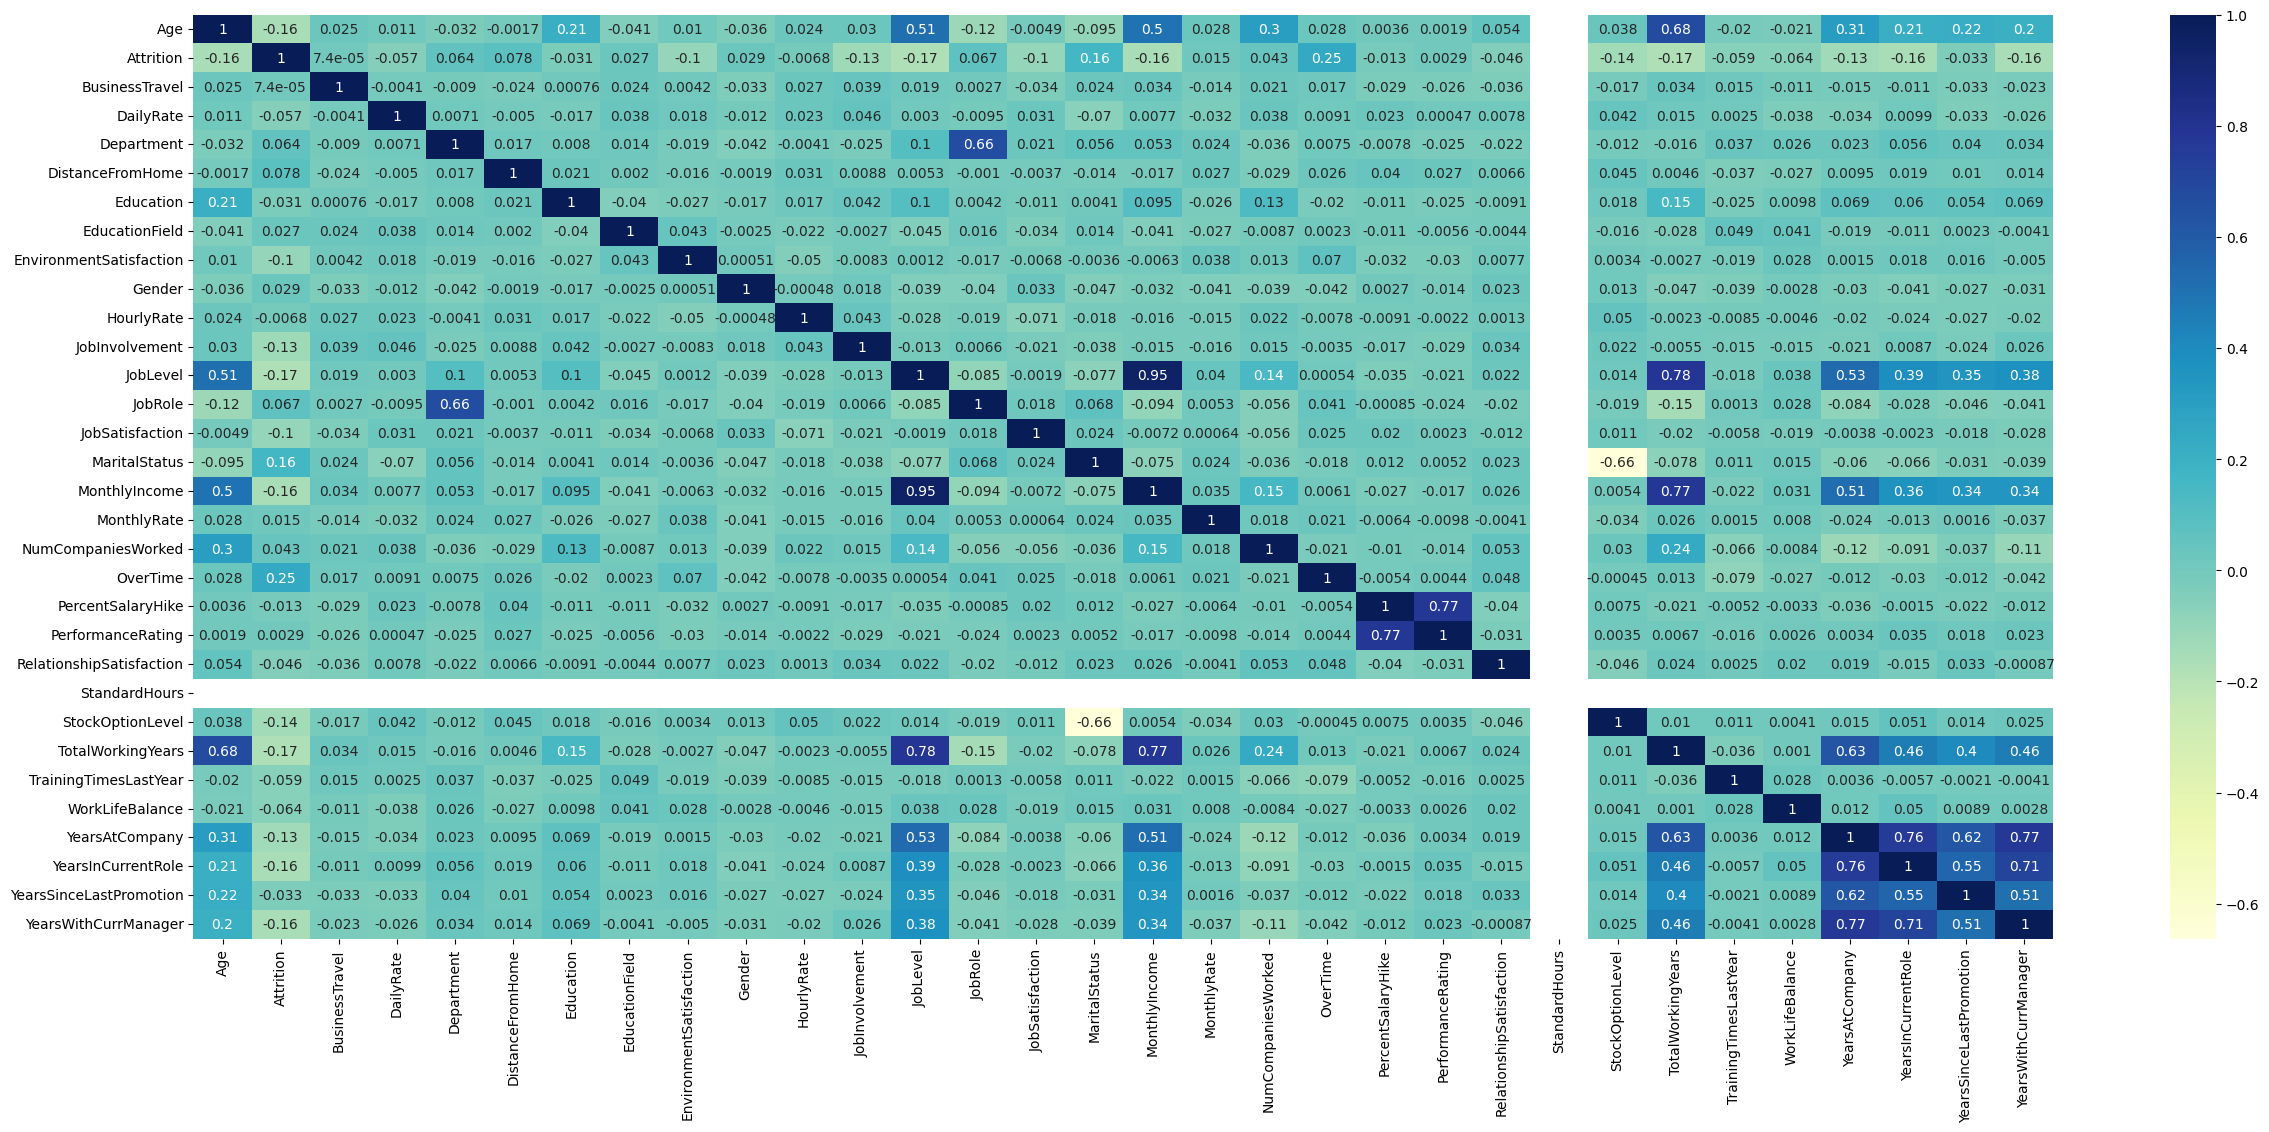

In [288]:
df1 = df.copy()

encoder = LabelEncoder()
for column in categorical_columns:
    df1[column] = encoder.fit_transform(df1[column])

plt.figure(figsize=(30,12))
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

#### Factorizing Attrition 

In [289]:
df["Attrition"] = df['Attrition'].factorize(['No','Yes'])[0]
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [290]:
px.bar(df.groupby(['Age', 'Attrition']).size().reset_index(name='Count'), 
       x='Age', y='Count', color='Attrition', barmode='group', title='Attrition Count by Age', 
       labels={'Count': 'Number of Employees'}).update_layout(legend_title='Attrition').update_traces(marker=dict(line=dict(width=1,color='DarkSlateGrey'))).show()


From this relationship between age and Attrition, we can see that\
1- The largest percentage of Attrition is from the age of 18 to 21 years, where 4 out of 8 employees left the company at the age of 18 (ie, 50%) Also, 6 out of 9 employees left at the age of 19 (66%).\
2- old people are more likely to leave  the company. This is because they have already spent many years working for a company and feel comfortable with the older employees are more likely to leave the company

In [291]:
print(df['Gender'].unique())

['Female' 'Male']


In [292]:
import plotly.express as px

px.histogram(df[df["Attrition"] == 1], x='Gender', color='Gender',
             title='Attrition by Gender', color_discrete_map={'Male': 'blue', 'Female': 'red'}).update_layout(bargap=0.2).show()


In [293]:
# Job Role vs Attrition
job_role_counts = df.groupby(['JobRole', 'Attrition']).size().reset_index(name='count')
fig = px.bar(job_role_counts, x='JobRole', y='count', color='Attrition', barmode='group', title='Job Role vs Attrition')
fig.show()

In [294]:
# Department vs Attrition
department_counts = df.groupby(['Department', 'Attrition']).size().reset_index(name='count')
fig = px.bar(department_counts, x='Department', y='count', color='Attrition', barmode='group', title='Department vs Attrition')
fig.show()

In [295]:
# Job Satisfaction vs Attrition
job_satisfaction_counts = df.groupby(['JobSatisfaction', 'Attrition']).size().reset_index(name='count')
fig = px.bar(job_satisfaction_counts, x='JobSatisfaction', y='count', color='Attrition', barmode='group', title='Job Satisfaction vs Attrition')
fig.show()

In [296]:
# Work-Life Balance vs Attrition
work_life_balance_counts = df.groupby(['WorkLifeBalance', 'Attrition']).size().reset_index(name='count')
fig = px.bar(work_life_balance_counts, x='WorkLifeBalance', y='count', color='Attrition', barmode='group', title='Work-Life Balance vs Attrition')
fig.show()

In [297]:
# Compare Age, Job Satisfaction, and Work-Life Balance using Scatter Plot
fig_scatter = px.scatter_3d(df, x='Age', y='JobSatisfaction', z='WorkLifeBalance', color='Attrition', title='Comparison of Age, Job Satisfaction, and Work-Life Balance')

# Compare Gender, Marital Status, and Education Field using Sunburst Plot
fig_sunburst = px.sunburst(df, path=['Gender', 'MaritalStatus', 'EducationField'], title='Comparison of Gender, Marital Status, and Education Field')

# Display the figures
fig_scatter.show()
fig_sunburst.show()


In [298]:
import pandas as pd
import plotly.express as px

# Grouping by 'JobRole', 'Department', and 'Attrition' columns and counting occurrences
grouped_data = df.groupby(['JobRole', 'Department', 'Attrition']).size().reset_index(name='Count')

# Plotting the radar chart using Plotly Express
fig_radar = px.line_polar(grouped_data, r='Count', theta='JobRole', color='Attrition',
                          line_close=True, template='plotly', title='Comparison of Job Role, Department, and Attrition')

# Adding legend
fig_radar.update_layout(legend_title='Attrition')

# Display the figure
fig_radar.show()


Text(0.5, 1.0, 'Performance Rating by Age and Gender')

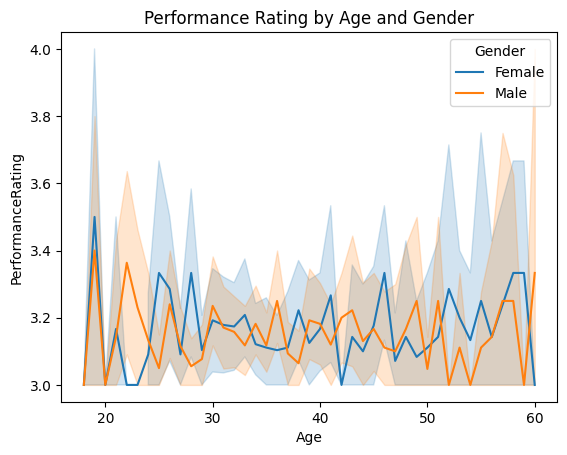

In [300]:
sns.lineplot(x='Age', y='PerformanceRating',hue='Gender'  ,data=df)
plt.title('Performance Rating by Age and Gender')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8')])

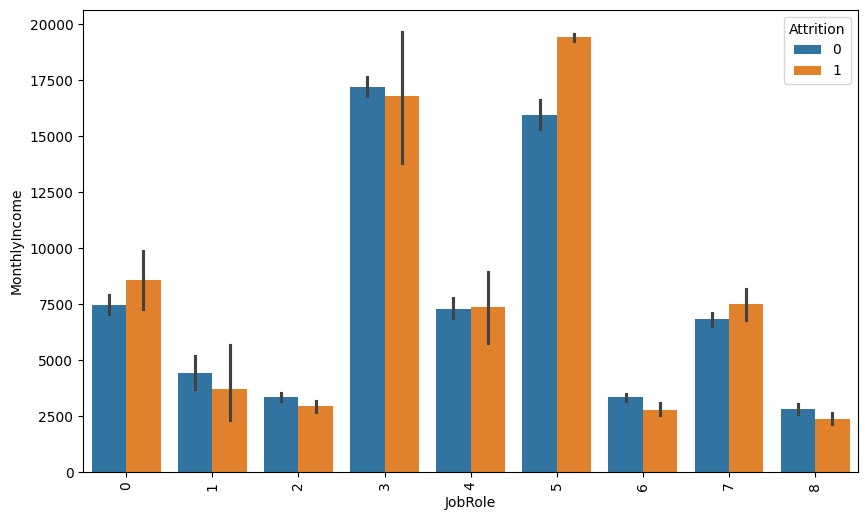

In [310]:
# Is salary is one of the main reasons?
plt.figure(figsize=(10,6))
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=df)
plt.xticks(rotation=90)

In [303]:
# Create the plot using plotly express
fig = px.scatter(df, x='Age', y='JobLevel', color='MaritalStatus',
                 title='Job Level by Age and Marital Status')
fig.show()

In [305]:
# Create the plot using plotly express
fig = px.scatter(df, x='Age', y='JobSatisfaction', color='BusinessTravel',
                 title='Job Satisfaction by Age and Business Travel', hover_data=['JobRole'])

# Add axis labels and customize the legend
fig.update_layout(xaxis_title='Age', yaxis_title='Job Satisfaction')
fig.update_traces(marker=dict(size=8))
fig.update_traces(marker=dict(size=10))

Feature Engineering 

In [313]:
df['MonthlyIncome/Age'] = df['MonthlyIncome'] / df['Age']
df["MonthlyIncome/Age"]

In [315]:
df["Age_risk"] = (df["Age"] < 34).astype(int)
df["Age_risk"]

0       0
1       0
2       0
3       1
4       1
       ..
1465    0
1466    0
1467    1
1468    0
1469    0
Name: Age_risk, Length: 1470, dtype: int32

In [317]:
df["DailyRate_risk"] = (df["DailyRate"] < 700).astype(int)
df["DailyRate_risk"]  

0       0
1       1
2       0
3       0
4       1
       ..
1465    0
1466    1
1467    1
1468    0
1469    1
Name: DailyRate_risk, Length: 1470, dtype: int32

In [318]:
df["Distance_risk"] = (df["DistanceFromHome"] >= 20).astype(int)
df["Distance_risk"]

0       0
1       0
2       0
3       0
4       0
       ..
1465    1
1466    0
1467    0
1468    0
1469    0
Name: Distance_risk, Length: 1470, dtype: int32

In [320]:
df["YearsAtCo_risk"] = (df["YearsAtCompany"] < 4).astype(int)
df["YearsAtCo_risk"]

0       0
1       0
2       1
3       0
4       1
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: YearsAtCo_risk, Length: 1470, dtype: int32

In [ ]:
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].replace(0, 1)
df['NumCompaniesWorked']

In [ ]:
df['AverageTenure'] = df["TotalWorkingYears"] / df["NumCompaniesWorked"]
df['AverageTenure']

In [ ]:

df['JobHopper'] = ((df["NumCompaniesWorked"] > 2) & (df["AverageTenure"] < 2.0)).astype(int)
df['JobHopper']

In [ ]:
df["AttritionRisk"] = df["Age_risk"] + df["DailyRate_risk"] + df["Distance_risk"] + df["YearsAtCo_risk"] + df['JobHopper']